In [1]:
import os
import numpy as np
from cmocean import cm
from nansat.nansat import Nansat
from nansat.domain import Domain
from nansat.nsr import NSR
from nansat.nansatmap import Nansatmap
import matplotlib.pyplot as plt

In [2]:
fn = 'ARC-METNO-ARC-TOPAZ4_2_PHYS-FOR-TDS-x-20-X100-y60-Y90-20170518-20170526.nc'
narc = Nansat(
    os.path.join('/vagrant/shared/test_data/cmems/', fn), 
    netcdf_dim={'time': np.datetime64('2017-05-25')}) 

In [3]:
fn = 'GLOBAL_ANALYSIS_FORECAST_PHY_001_024-TDS-x-20-X100-y60-Y90-201705181200-201705271200.nc'
nglob = Nansat(
    os.path.join('/vagrant/shared/test_data/cmems',fn),
    netcdf_dim={'time': np.datetime64('2017-05-25')}) 

In [4]:
d = Domain('+proj=stere +lon_0=55 +lat_0=75 +no_defs',
           '-te -3000000 -1000000 1000000 800000 -tr 10000 10000')
narc.reproject(d)
nglob.reproject(d)

In [5]:
# Show Sea Surface Temperature (SST)
nmap = Nansatmap(narc, resolution='l')
nmap.imshow(nglob['thetao'], vmin=4, vmax=10, cmap=cm.thermal)
nmap.drawmeridians(np.arange(-20, 100, 30), labels=[False,False,True,False])
nmap.drawparallels(np.arange(60, 90, 5), labels=[True, False, False, False])
nmap.add_colorbar()
nmap.save('tglob_map.png', dpi=300)
nmap.imshow(narc['temperature'], vmin=4, vmax=10, cmap=cm.thermal)
nmap.drawmeridians(np.arange(-20, 100, 30), labels=[False,False,True,False])
nmap.drawparallels(np.arange(60, 90, 5), labels=[True, False, False, False])
nmap.save('tarc_map.png', dpi=300)
plt.close('all')

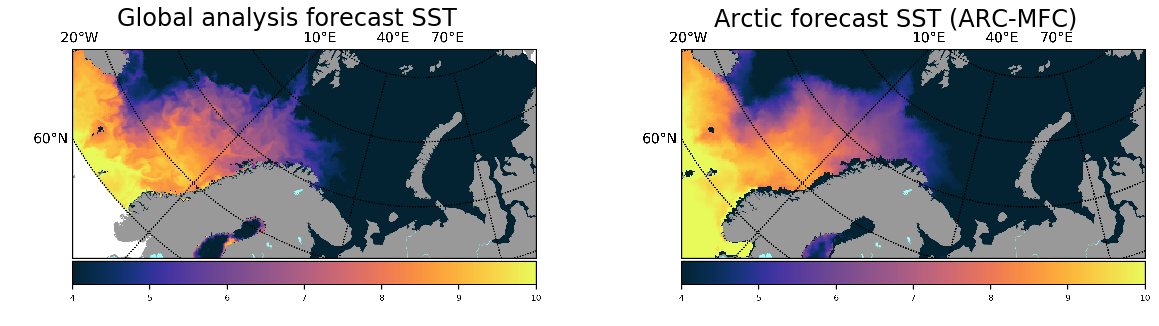

In [6]:
plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(plt.imread('tglob_map.png'))
ax[0].axis('off')
ax[0].set_title('Global analysis forecast SST', fontsize=24)
ax[1].imshow(plt.imread('tarc_map.png'))
ax[1].axis('off')
ax[1].set_title('Arctic forecast SST (ARC-MFC)', fontsize=24)
#t = plt.suptitle('Sea Surface Temperature, 2017-05-25', fontsize=32)
plt.show()

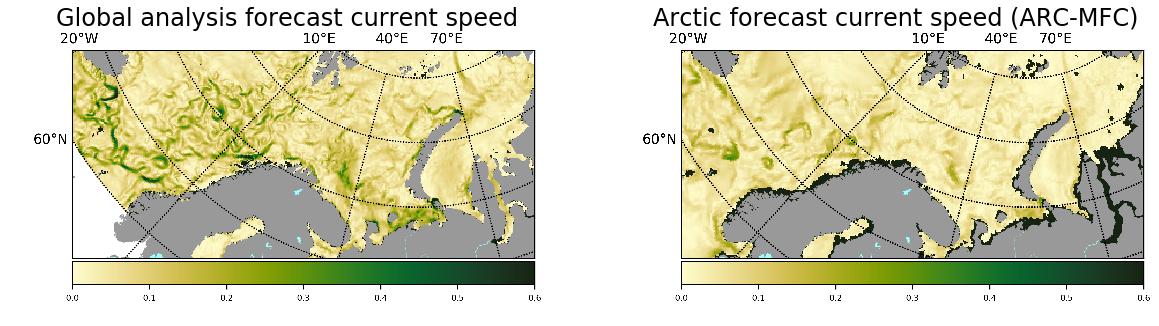

In [7]:
# Show current speed
nmap = Nansatmap(narc, resolution='l')
nmap.imshow(np.sqrt(np.square(nglob['uo'])+np.square(nglob['vo'])), vmin=0, vmax=0.6, cmap=cm.speed)
nmap.drawmeridians(np.arange(-20, 100, 30), labels=[False,False,True,False])
nmap.drawparallels(np.arange(60, 90, 5), labels=[True, False, False, False])
nmap.add_colorbar()
nmap.save('speed_glob_map.png', dpi=300)
nmap.imshow(np.sqrt(np.square(narc['u'])+np.square(narc['v'])), vmin=0, vmax=0.6, cmap=cm.speed)
nmap.drawmeridians(np.arange(-20, 100, 30), labels=[False,False,True,False])
nmap.drawparallels(np.arange(60, 90, 5), labels=[True, False, False, False])
nmap.save('speed_arc_map.png', dpi=300)
plt.close('all')

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(plt.imread('speed_glob_map.png'))
ax[0].axis('off')
ax[0].set_title('Global analysis forecast current speed', fontsize=24)
ax[1].imshow(plt.imread('speed_arc_map.png'))
ax[1].axis('off')
ax[1].set_title('Arctic forecast current speed (ARC-MFC)', fontsize=24)
#t = plt.suptitle('Sea Surface Temperature, 2017-05-25', fontsize=32)
plt.show()